In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'2.16.1'

In [2]:
import pandas as pd
df = pd.read_csv('C:\\Users\\User\\Desktop\\Msc Computational physics\\Υπολογιστική Κβαντομηχανική\\HIGGS_8K.csv')
df.head() 

,1.000000000000000000e+00,8.692932128906250000e-01,-6.350818276405334473e-01,2.256902605295181274e-01,3.274700641632080078e-01,-6.899932026863098145e-01,7.542022466659545898e-01,-2.485731393098831177e-01,-1.092063903808593750e+00,0.000000000000000000e+00,...,-1.045456994324922562e-02,-4.576716944575309753e-02,3.101961374282836914e+00,1.353760004043579102e+00,9.795631170272827148e-01,9.780761599540710449e-01,9.200048446655273438e-01,7.216574549674987793e-01,9.887509346008300781e-01,8.766783475875854492e-01
0,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
1,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
2,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
3,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
4,1.0,0.661761,0.486930,0.542516,2.630618,1.098063,1.021878,-2.306271,-0.652999,0.000000,...,-0.943217,0.566404,3.101961,4.883954,2.585889,0.992005,1.935075,1.144530,1.818775,2.094304


In [3]:
data_class= df.iloc[:,0] #Classification(1=signal,0=background)
data = df.iloc[:,1:] #All data low and high 

In [4]:
from sklearn.model_selection import train_test_split
data_train, data_test, data_class_train, data_class_test = train_test_split(data, data_class, test_size = 0.2)


In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_train = sc.fit_transform(data_train)
data_test = sc.transform(data_test)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Input
ann = tf.keras.models.Sequential()

In [7]:
ann.add(Input(shape=(28,)))

In [8]:
ann.add(tf.keras.layers.Dense(50, activation='relu'))

In [13]:
ann.add(tf.keras.layers.Dense(50, activation='relu'))

In [14]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 50)                  │           1,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,601 (25.79 KB)

 Trainable params: 6,601 (25.79 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
ann.fit(data_train, data_class_train, batch_size = 16, epochs = 100)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5506 - loss: 0.6821
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6559 - loss: 0.6195
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6722 - loss: 0.5972
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6911 - loss: 0.5804
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7157 - loss: 0.5497
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7213 - loss: 0.5371
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7418 - loss: 0.5185
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7373 - loss: 0.5141
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7484 - loss: 0.5009
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7666 - loss: 0.4872
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7804 - loss: 0.4589
Epoch 12/100
400/400 ━━━━━━━━━━━━━━━━━━━━

In [17]:
data_pred = ann.predict(data_test)
data_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[9.9954361e-01],
       [1.3436732e-08],
       [3.2225847e-12],
       ...,
       [9.9997109e-01],
       [9.9999994e-01],
       [9.1079845e-13]], dtype=float32)

In [19]:
data_pred = (data_pred > 0.5)
data_pred

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(data_class_test, data_pred)
print(cm)
accuracy_score(data_class_test, data_pred)

[[472 266]
 [330 532]]


0.6275

In [21]:
loss, accuracy = ann.evaluate(data_test, data_class_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6566 - loss: 2.9366
Test loss: 3.235175132751465
Test accuracy: 0.6274999976158142


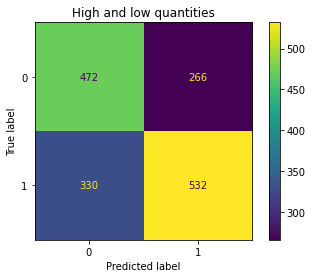

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp21 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp21.plot()
plt.title("High and low quantities")
plt.show()